<a href="https://colab.research.google.com/github/JozefSL/pyNotes/blob/main/NorthDakota/maxPlots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import files
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.rcParams["figure.figsize"] = (16, 8)
sns.set_style("white")
uploaded = files.upload()

In [13]:
data = pd.read_excel('ND_BakkenPublic.xlsx')
data.tail(3)

,API14,Pool,feDate,maxPo,maxPg,MHB,LL,APINumber,JobEndDate,WaterGal,SandLB
3845,33105060510000,BAKKEN,2024-03-01,450.310345,1318.413793,DN88ln,10717.311777,33105060510000,2023-11-02,7912265.0,10115174.70
3846,33105060520000,BAKKEN,2024-03-01,314.290323,875.387097,DN88ln,10730.701064,33105060520000,2023-11-02,7987943.0,10114924.95
3847,33105061140000,BAKKEN,2024-02-01,963.206897,1421.310345,DN88oh,9899.942026,33105061140000,2023-12-22,8083362.0,9652284.00


In [14]:
data['year'] = data['feDate'].dt.year   #.str[:4]
data['Gas'] = data.maxPg/6
data['Oil'] = data.maxPo

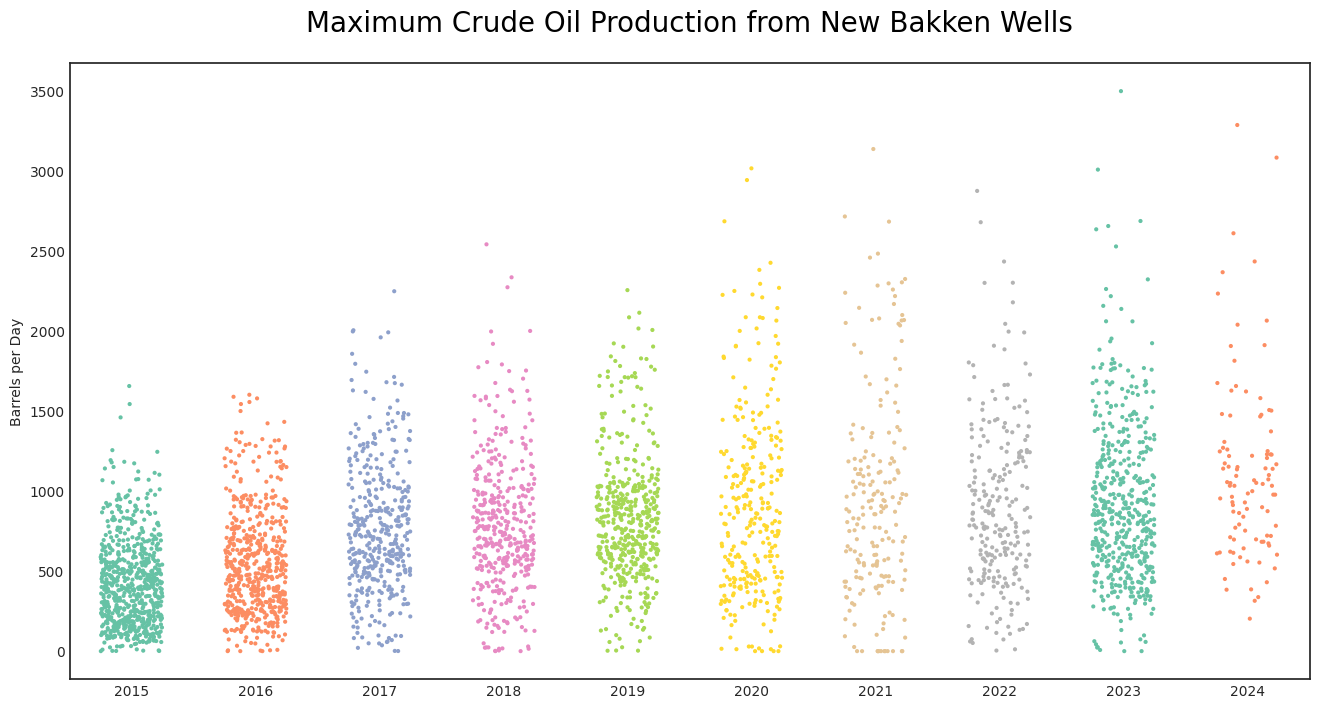

In [18]:
plt.title('Maximum Crude Oil Production from New Bakken Wells', pad=23, color='black', size=20)
sns.stripplot(x="year", y="maxPo", data=data, size=3, hue='year',legend=False, palette='Set2',
              jitter=0.25).set(xlabel=None, ylabel='Barrels per Day');

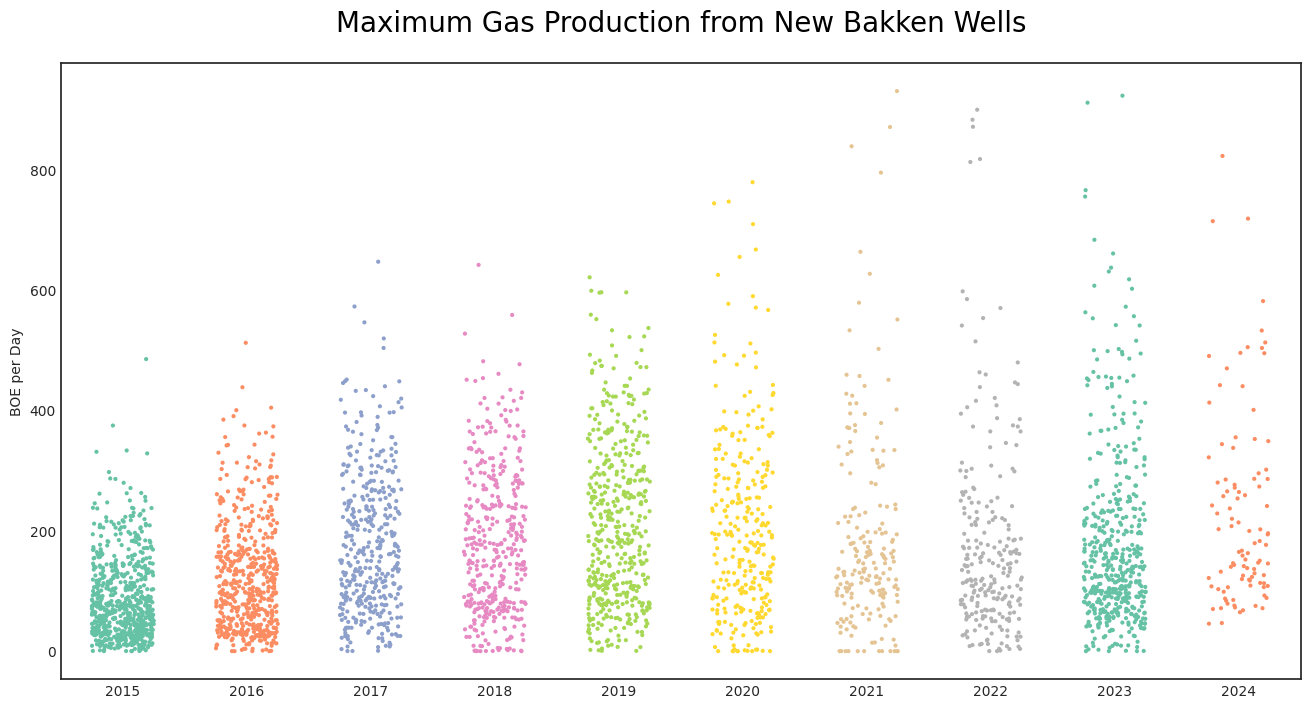

In [19]:
plt.title('Maximum Gas Production from New Bakken Wells', pad=23, color='black', size=20)
sns.stripplot(x="year", y="Gas", data=data, size=3,hue='year',legend=False, palette='Set2',
              jitter=0.25).set(xlabel=None, ylabel='BOE per Day');

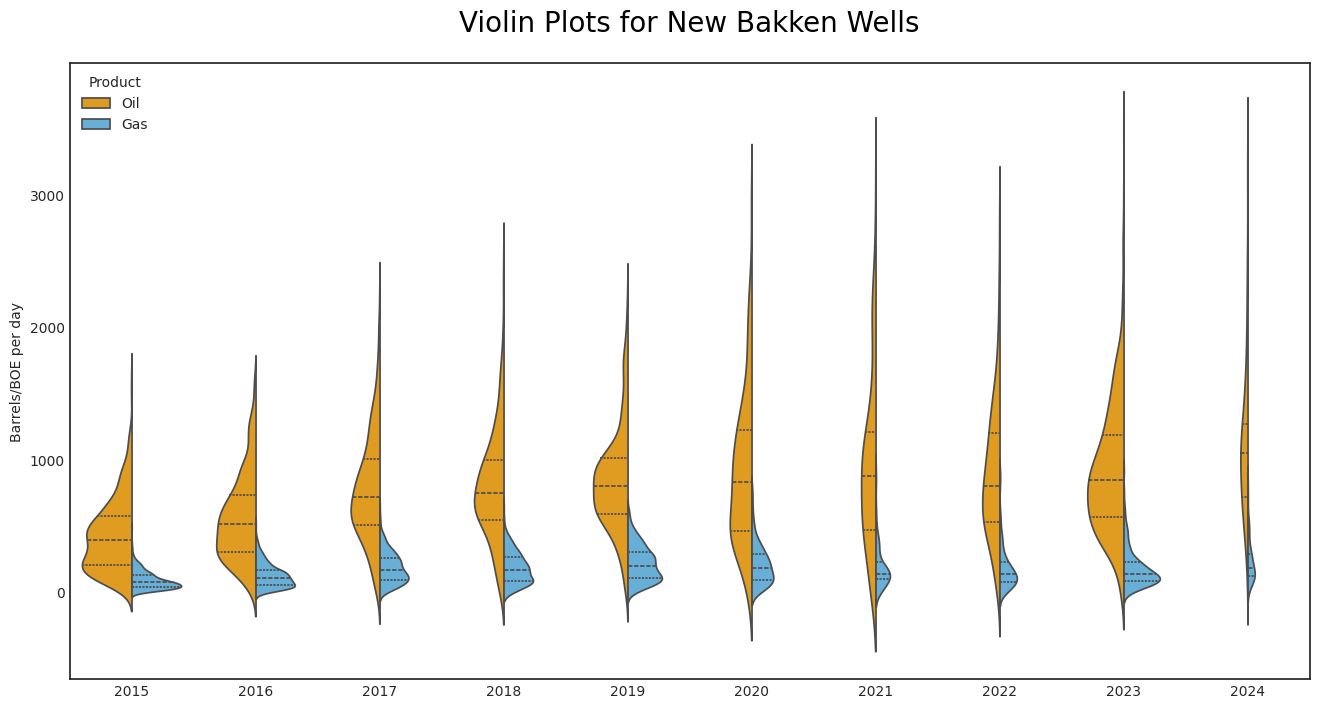

In [20]:
dfVh = data[['Oil', 'Gas','year']]
dfVmh = dfVh.melt(id_vars='year' ,var_name='Product', value_name='BOE_Flow')
plt.title('Violin Plots for New Bakken Wells', pad=23, color='black', size=20)
jlcolour = {"Gas": "C5", "Oil": "orange"}
sns.violinplot(x="year", y='BOE_Flow', hue='Product', data=dfVmh, split=True, inner='quartile',
    density_norm='count', palette=jlcolour).set(xlabel=None, ylabel='Barrels/BOE per day')
plt.legend(loc='upper left',title='Product');